Importing the Dependencies

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [59]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [60]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [61]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [63]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [64]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [65]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [66]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [67]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-67-9c9fabfe2615>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
<ipython-input-67-9c9fabfe2615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [68]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [69]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [70]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [71]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

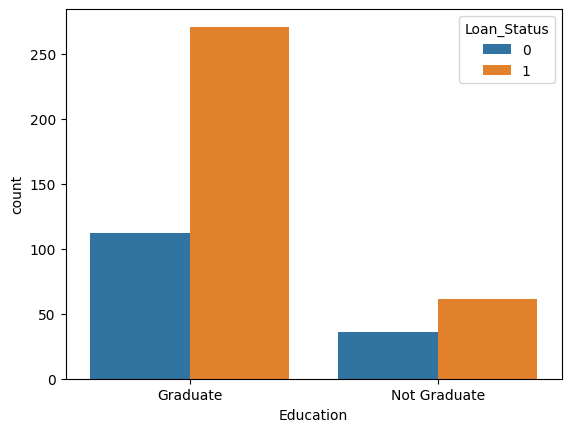

In [72]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

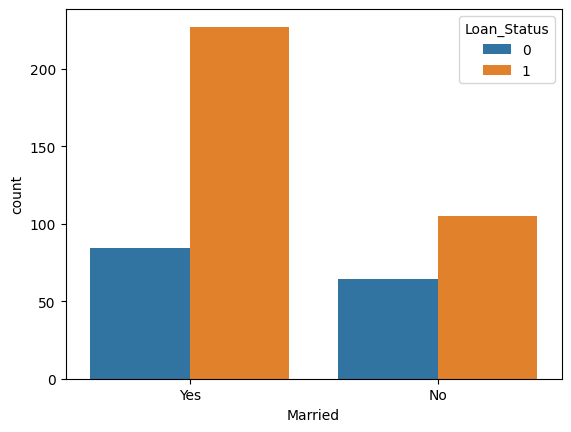

In [73]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [74]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-74-cc448655d7b3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [75]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [76]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [77]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

##Logistic Regression


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [79]:
df=loan_dataset

In [80]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [81]:
X = df.drop(columns=["Loan_ID", "Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable

In [82]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [84]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

In [85]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8229


In [86]:
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, y_pred)}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [87]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11 17]
 [ 0 68]]


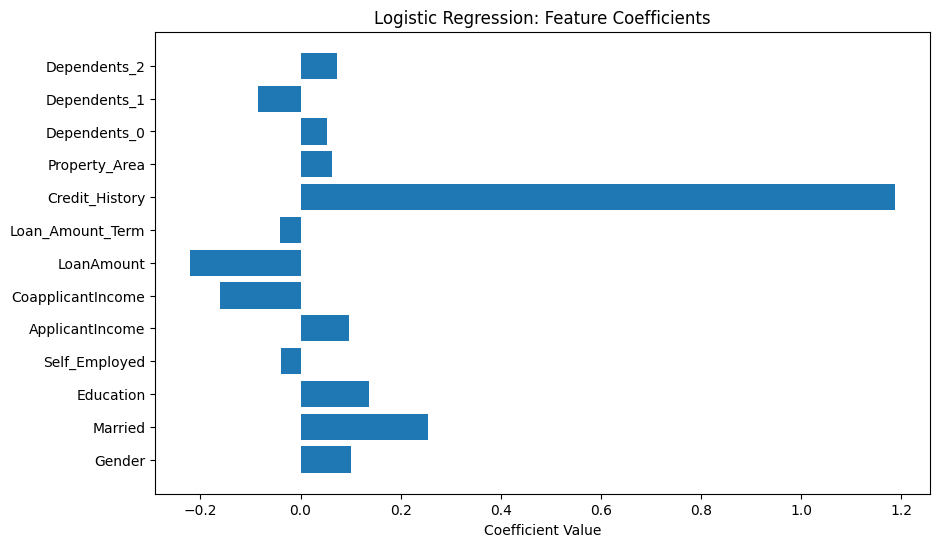

In [88]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Plot coefficients
coefficients = lr_model.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(X.columns, coefficients)
plt.title("Logistic Regression: Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()


##Decision Tree

In [89]:
# Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming your dataset is loaded as 'df'
# df = pd.read_csv('your_dataset.csv')

# Preprocess the data (assuming Loan_Status is the target column)
X = df.drop(columns=["Loan_ID", "Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable

# Handling categorical features (encoding them)
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Print classification report
print(f"Classification Report for Decision Tree:\n{classification_report(y_test, y_pred)}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix\n",cm)


Decision Tree Accuracy: 0.7708
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        28
           1       0.82      0.87      0.84        68

    accuracy                           0.77        96
   macro avg       0.72      0.70      0.71        96
weighted avg       0.76      0.77      0.77        96

confusion matrix
 [[15 13]
 [ 9 59]]


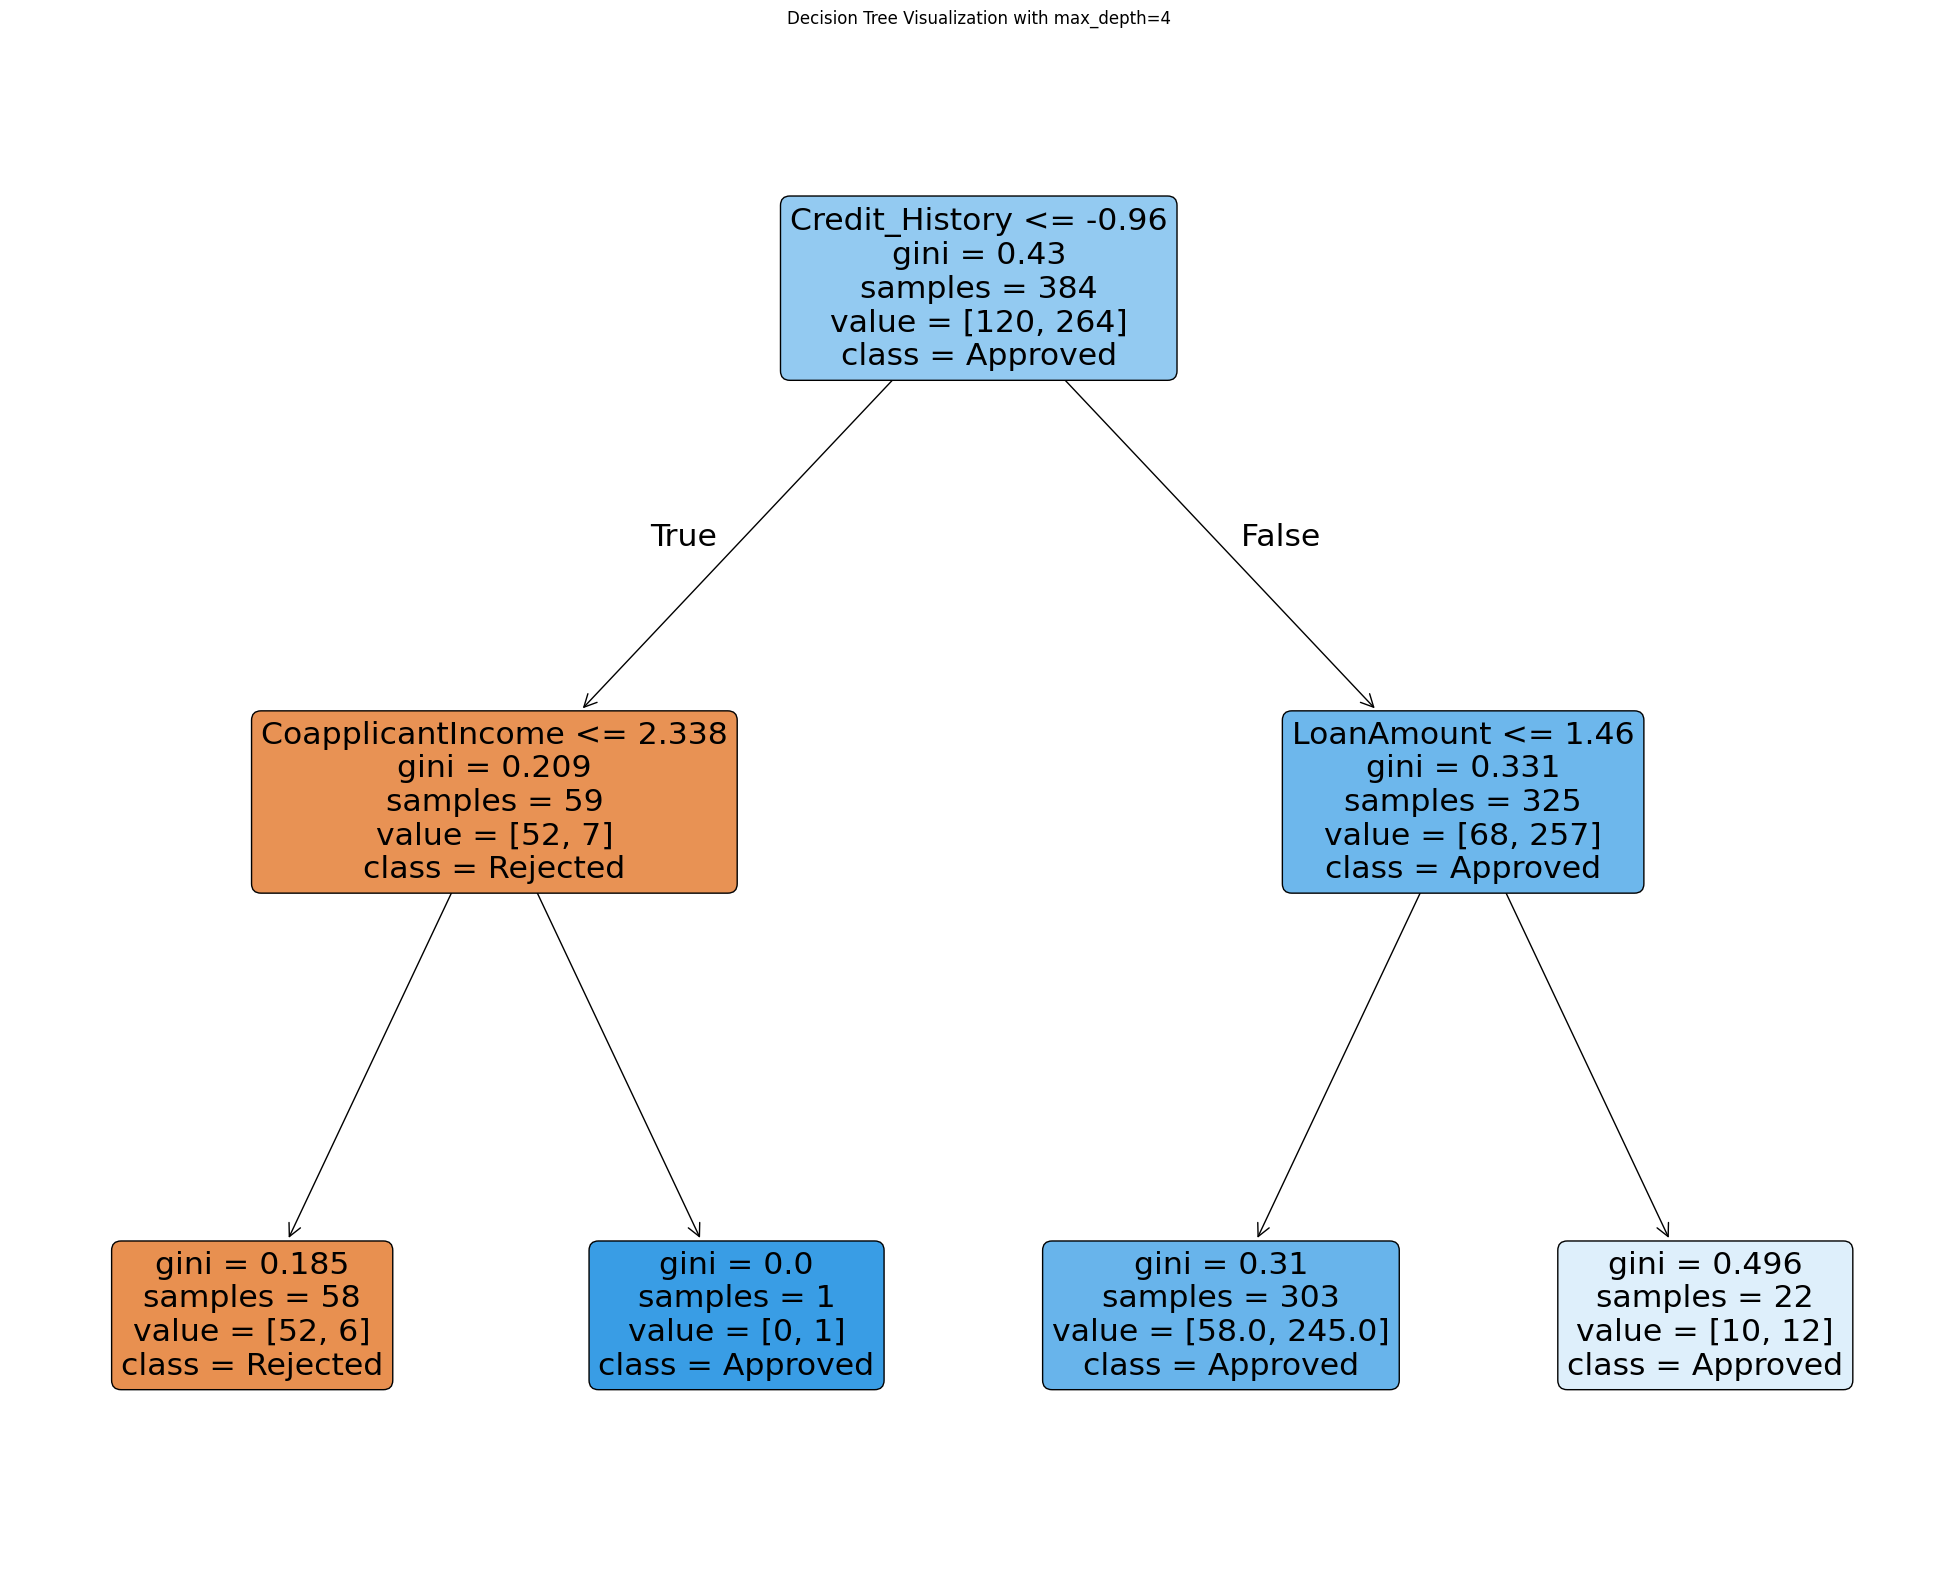

In [90]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train_scaled, y_train)

# Plot Decision Tree
plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Rejected", "Approved"], rounded=True)
plt.title("Decision Tree Visualization with max_depth=4")
plt.show()


#K-Nearest Neighbors (KNN) Model


In [91]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming your dataset is loaded as 'df'
# df = pd.read_csv('your_dataset.csv')

# Preprocess the data (assuming Loan_Status is the target column)
X = df.drop(columns=["Loan_ID", "Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable

# Handling categorical features (encoding them)
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

# Print classification report
print(f"Classification Report for KNN:\n{classification_report(y_test, y_pred)}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)


KNN Accuracy: 0.8125
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96

Confusion Matrix
 [[11 17]
 [ 1 67]]


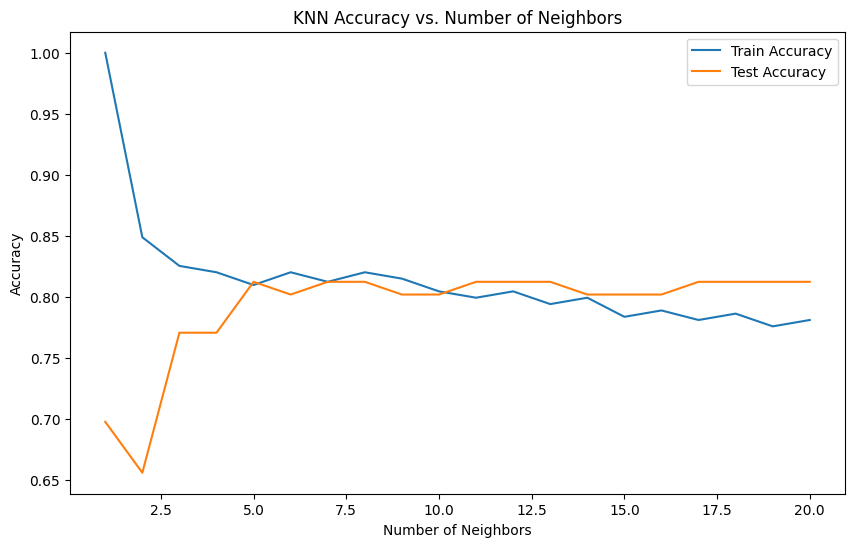

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Range of neighbors to check
neighbors_range = range(1, 21)
train_accuracies = []
test_accuracies = []

# Train and evaluate KNN for each number of neighbors
for n_neighbors in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_scaled, y_train)

    train_accuracies.append(accuracy_score(y_train, knn_model.predict(X_train_scaled)))
    test_accuracies.append(accuracy_score(y_test, knn_model.predict(X_test_scaled)))

# Plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_accuracies, label="Train Accuracy")
plt.plot(neighbors_range, test_accuracies, label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.legend()
plt.show()


# Naive Bayes Model


In [93]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocess the data (assuming Loan_Status is the target column)
X = df.drop(columns=["Loan_ID", "Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable

# Handling categorical features (encoding them)
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

# Print classification report
print(f"Classification Report for Naive Bayes:\n{classification_report(y_test, y_pred)}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)


Naive Bayes Accuracy: 0.8229
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        28
           1       0.81      0.99      0.89        68

    accuracy                           0.82        96
   macro avg       0.87      0.71      0.74        96
weighted avg       0.84      0.82      0.80        96

Confusion Matrix
 [[12 16]
 [ 1 67]]


<ipython-input-94-ba4f3d5c18ce>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_scaled[y_train == 0][:, 0], label="Class 0", shade=True)
<ipython-input-94-ba4f3d5c18ce>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_scaled[y_train == 1][:, 0], label="Class 1", shade=True)


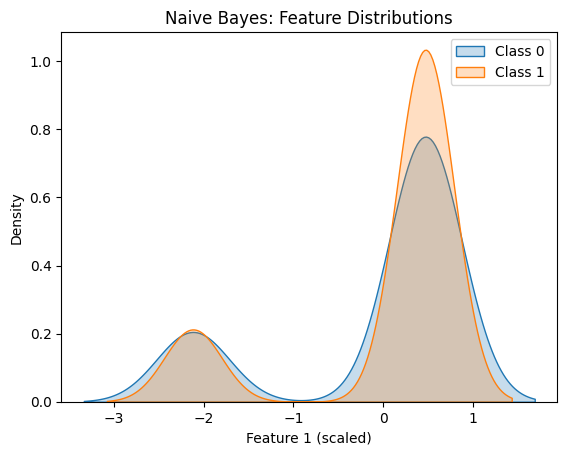

In [94]:
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Plot Gaussian distributions for each class (Assuming 2 classes)
sns.kdeplot(X_train_scaled[y_train == 0][:, 0], label="Class 0", shade=True)
sns.kdeplot(X_train_scaled[y_train == 1][:, 0], label="Class 1", shade=True)
plt.title("Naive Bayes: Feature Distributions")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Random Forest Model


In [95]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# df = pd.read_csv('your_dataset.csv')

# Preprocess the data (assuming Loan_Status is the target column)
X = df.drop(columns=["Loan_ID", "Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable

# Handling categorical features (encoding them)
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print classification report
print(f"Classification Report for Random Forest:\n{classification_report(y_test, y_pred)}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)



Random Forest Accuracy: 0.8125
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       0.81      0.96      0.88        68

    accuracy                           0.81        96
   macro avg       0.81      0.71      0.73        96
weighted avg       0.81      0.81      0.79        96

Confusion Matrix
 [[13 15]
 [ 3 65]]


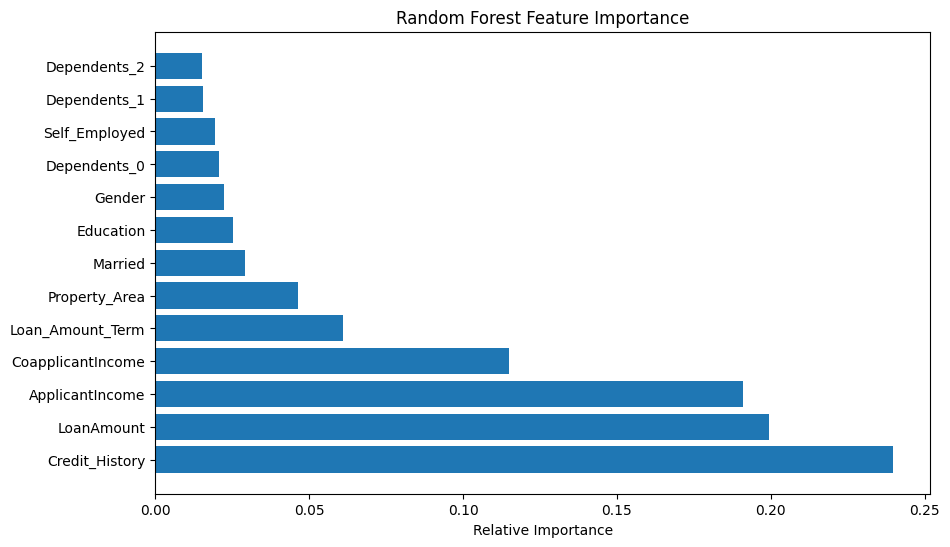

In [96]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Plot Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train_scaled.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


In [113]:
X_train, X_test,Y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [114]:
print(X.shape, X_train.shape, X_test.shape)

(480, 13) (432, 13) (48, 13)


Training the model:

Support Vector Machine Model

In [115]:
classifier = svm.SVC(kernel='linear')

In [116]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [117]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [118]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7870370370370371


In [122]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [120]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Making a predictive system

In [125]:
X = df.drop(columns=["Loan_ID", "Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Train the classifier
classifier = svm.SVC(kernel='linear', class_weight='balanced')
classifier.fit(X_train_scaled, y_train)

# Input data for prediction
#input_data=(0,0,0,1,0,3510,0,76,360,0,1)  # Expected prediction 0
input_data=(0,0,1,1,1,4000,1,85,400,1,1) # Example features that predict 1
#input_data=(1,1,0,0,0,2583,2358,120,360,1,2)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1, -1)  # Ensure it's a 2D array

# Scale the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Make the prediction
prediction = classifier.predict(input_data_scaled)
print(f'Predicted value is: {prediction[0]}')

# Output loan status
if prediction[0] == 0:
    print('Loan rejected')
else:
    print('Loan approved')

Predicted value is: 1
Loan approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
